In [41]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
import pandas as pd
sns.set_style('darkgrid')

In [2]:
dataset_path = '../augmenting_nlms_meco_data/joint_data_trimmed.csv'

In [3]:
df = pd.read_csv(dataset_path, index_col=0)

In [4]:
df.head()

,subid,trialid,itemid,cond,sentnum,ianum,ia,blink,skip,nrun,...,singlefix.sac.in,singlefix.sac.out,singlefix.launch,singlefix.land,singlefix.cland,singlefix.dur,lang,trial,supplementary_id,uniform_id
1,du_01,1.0,1.0,1.0,1.0,1.0,Janus,1.0,0.0,2.0,...,NaN,15.0,NaN,0.0,-3.0,154.0,du,NaN,DU_01,du_1
2,du_01,1.0,1.0,1.0,1.0,2.0,is,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,du,NaN,DU_01,du_1
3,du_01,1.0,1.0,1.0,1.0,3.0,in,0.0,0.0,1.0,...,7.0,6.0,6.0,1.0,-0.5,551.0,du,NaN,DU_01,du_1
4,du_01,1.0,1.0,1.0,1.0,4.0,de,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,du,NaN,DU_01,du_1
5,du_01,1.0,1.0,1.0,1.0,5.0,oude,1.0,0.0,2.0,...,15.0,-13.0,14.0,1.0,-1.5,189.0,du,NaN,DU_01,du_1


In [5]:
gaze_features = ["skip", "firstfix.dur", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "refix", "reread"]
other_features = ["trialid", "sentnum", "ianum", "ia", "lang", "uniform_id"]
df = df[other_features + gaze_features]

In [6]:
df.head()

,trialid,sentnum,ianum,ia,lang,uniform_id,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
1,1.0,1.0,1.0,Janus,du,du_1,0.0,154.0,154.0,400.0,1.0,2.0,0.0,1.0
2,1.0,1.0,2.0,is,du,du_1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,3.0,in,du,du_1,0.0,551.0,551.0,551.0,1.0,1.0,0.0,0.0
4,1.0,1.0,4.0,de,du,du_1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,1.0,5.0,oude,du,du_1,0.0,189.0,189.0,439.0,1.0,2.0,0.0,1.0


# English

In [7]:
en_df = df[df['lang'] == 'en']

In [8]:
en_stats_df = pd.DataFrame(columns = gaze_features)

In [9]:
en_users = [6, 49, 57, 83, 98]

In [10]:
for user in en_users:
    user_df = en_df[en_df['uniform_id'] == f'en_{user}']
    user_mean = user_df[gaze_features].mean()
    user_std = user_df[gaze_features].std()
    en_stats_df.loc[f'{user}_mean'] = user_mean
    en_stats_df.loc[f'{user}_std'] = user_std
en_stats_df.loc['all_mean'] = en_df[gaze_features].mean()
en_stats_df.loc['all_std'] = en_df[gaze_features].std()

In [11]:
sorted_cols = ['dur', 'firstfix.dur', 'firstrun.dur', 'firstrun.nfix', 'nfix', 'refix', 'reread', 'skip']

In [12]:
en_stats_df[sorted_cols]#.filter(items=['all_mean', 'all_std'], axis=0)

,dur,firstfix.dur,firstrun.dur,firstrun.nfix,nfix,refix,reread,skip
6_mean,408.794872,186.910569,240.859912,1.304565,2.247029,0.347092,0.455285,0.241461
6_std,311.159943,97.811005,153.756424,0.580598,1.574480,0.476194,0.498152,0.428071
49_mean,320.335252,210.985612,252.392806,1.187050,1.497842,0.185612,0.221583,0.332373
49_std,226.026097,87.682587,137.692740,0.470580,0.827958,0.389073,0.415611,0.471290
57_mean,425.475550,231.377751,290.734719,1.262836,1.872861,0.238386,0.353301,0.330606
57_std,361.622185,93.614671,182.553744,0.686012,1.566470,0.426357,0.478288,0.470624
83_mean,250.767273,191.270545,209.077818,1.093091,1.298909,0.096727,0.158545,0.347723
83_std,144.017945,62.637153,98.812022,0.337044,0.636212,0.295694,0.365385,0.476361
98_mean,368.672800,212.836688,249.998850,1.198965,1.797010,0.211616,0.362852,0.175047
98_std,259.375117,85.606721,138.233871,0.469531,1.141674,0.408571,0.480961,0.380098


## Italian

In [13]:
it_df = df[df['lang'] == 'it']

In [14]:
it_stats_df = pd.DataFrame(columns = gaze_features)

In [15]:
it_users = [1, 26, 38, 43, 44]

In [16]:
for user in it_users:
    user_df = it_df[it_df['uniform_id'] == f'it_{user}']
    user_mean = user_df[gaze_features].mean()
    user_std = user_df[gaze_features].std()
    it_stats_df.loc[f'{user}_mean'] = user_mean
    it_stats_df.loc[f'{user}_std'] = user_std
it_stats_df.loc['all_mean'] = it_df[gaze_features].mean()
it_stats_df.loc['all_std'] = it_df[gaze_features].std()

In [72]:
test_list = user_df['dur'].dropna().tolist()

mean = sum(test_list) / len(test_list) 
variance = sum([((x - mean) ** 2) for x in test_list]) / len(test_list) 
variance ** 0.5, mean

(412.0493499285615, 512.1083188908145)

In [17]:
it_stats_df[sorted_cols]

,dur,firstfix.dur,firstrun.dur,firstrun.nfix,nfix,refix,reread,skip
1_mean,459.660365,212.031735,289.543552,1.380149,2.205267,0.367995,0.420662,0.233833
1_std,369.822701,98.785967,194.637503,0.760057,1.657416,0.482423,0.493832,0.423377
26_mean,368.071520,211.054917,277.809068,1.321839,1.754151,0.282886,0.273946,0.259224
26_std,289.936567,84.282248,192.767151,0.829101,1.251286,0.450546,0.446124,0.438313
38_mean,662.205512,251.129134,301.362992,1.227559,2.800000,0.266142,0.644882,0.195184
38_std,507.174659,114.859063,169.493938,0.545225,1.978848,0.442113,0.478738,0.396468
43_mean,312.691066,219.748116,249.038751,1.158235,1.482239,0.158235,0.243272,0.337847
43_std,188.403354,77.911567,123.066970,0.417478,0.805395,0.365157,0.429289,0.473145
44_mean,512.108319,222.307626,259.973137,1.205373,2.407279,0.289428,0.514731,0.275126
44_std,412.227997,85.401129,129.632840,0.489550,1.850571,0.453694,0.500000,0.446718


## Plot

In [43]:
en_df.loc[:, gaze_features] =  (en_df[gaze_features] - en_df[gaze_features].min()) / (en_df[gaze_features].max() - en_df[gaze_features].min())
melted_en_df = pd.melt(filtered_en_df, id_vars=['uniform_id'], value_vars=gaze_features, var_name='feature', value_name='value')
melted_en_df = melted_en_df.sort_values('feature')
overall_mean_variance_en = melted_en_df.groupby('feature')['value'].agg(['mean', 'var']).reset_index()
melted_en_df = melted_en_df[melted_en_df['uniform_id'].isin([f'en_{user_n}' for user_n in en_users])]

In [76]:
continuous = melted_en_df[~melted_en_df['feature'].isin(['refix', 'reread', 'skip'])]

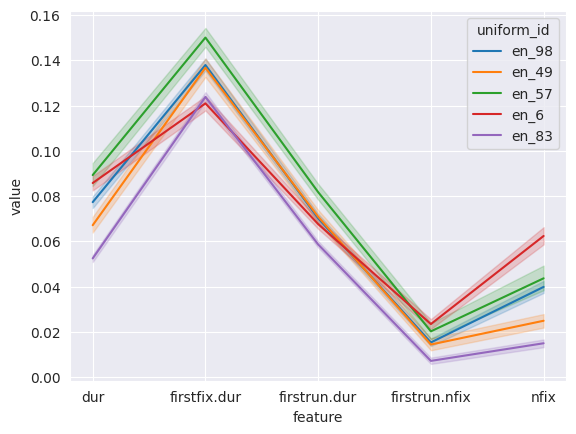

In [77]:
sns.lineplot(data = continuous, x='feature', y='value', hue='uniform_id');

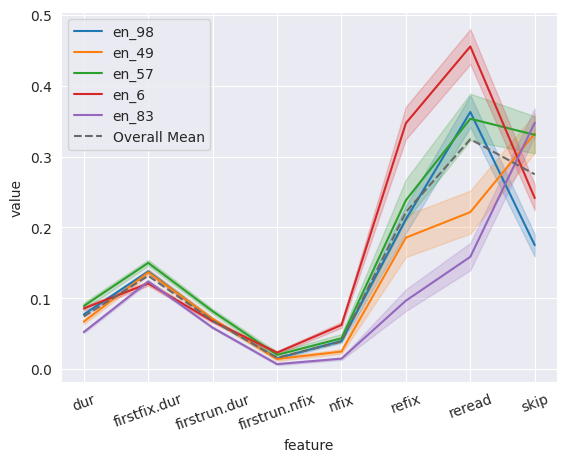

In [56]:
sns.lineplot(data = melted_en_df, x='feature', y='value', hue='uniform_id');
plt.plot(overall_mean_variance_en['feature'], overall_mean_variance_en['mean'], label='Overall Mean', color='dimgray', linestyle='--')#, linewidth=2, color='black');
plt.legend(loc='upper left')
plt.xticks(rotation=20)
plt.show()
# plt.fill_between(overall_mean_variance['feature'], 
#                  overall_mean_variance['mean'] - overall_mean_variance['var'], 
#                  overall_mean_variance['mean'] + overall_mean_variance['var'], 
#                  color='gray', alpha=0.2, label='Overall Variance')

In [46]:
it_df.loc[:, gaze_features] =  (it_df[gaze_features] - it_df[gaze_features].min()) / (it_df[gaze_features].max() - it_df[gaze_features].min())
melted_it_df = pd.melt(it_df, id_vars=['uniform_id'], value_vars=gaze_features, var_name='feature', value_name='value')
melted_it_df = melted_it_df.sort_values('feature')
overall_mean_variance_it = melted_it_df.groupby('feature')['value'].agg(['mean', 'var']).reset_index()
melted_it_df = melted_it_df[melted_it_df['uniform_id'].isin([f'it_{user_n}' for user_n in it_users])]

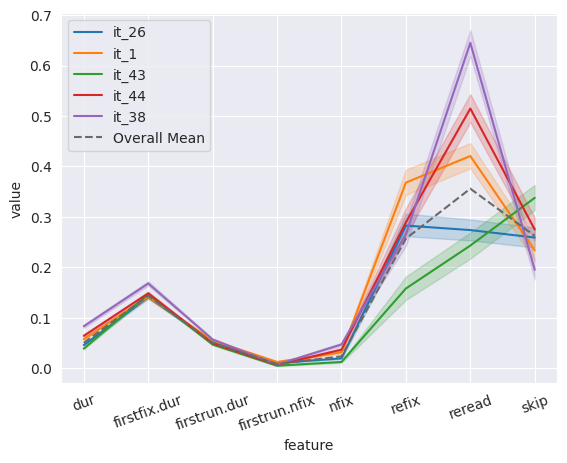

In [57]:
sns.lineplot(data = melted_it_df, x='feature', y='value', hue='uniform_id');
plt.plot(overall_mean_variance_it['feature'], overall_mean_variance_it['mean'], label='Overall Mean', color='dimgray', linestyle='--');#, linewidth=2, color='black');
plt.legend(loc='upper left')
plt.xticks(rotation=20)
plt.show()